In [2]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
# from ann_visualizer.visualize import ann_viz;
from keras.utils import plot_model



ImportError: cannot import name 'deserialize_keras_object' from partially initialized module 'keras.saving.legacy.serialization' (most likely due to a circular import) (C:\Users\szymo\AppData\Roaming\Python\Python311\site-packages\keras\saving\legacy\serialization.py)

In [ ]:
df = pd.read_csv("diabetes.csv") 
df['class'] = df['class'].map({'tested_negative': 0, 'tested_positive': 1})

X = df.values[:, :-1]
y = df.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)#278823)

In [ ]:
# scaler = StandardScaler()

# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))

17/17 [==============================] - 0s 6ms/step
0.7560521415270018
8/8 [==============================] - 0s 6ms/step
0.696969696969697


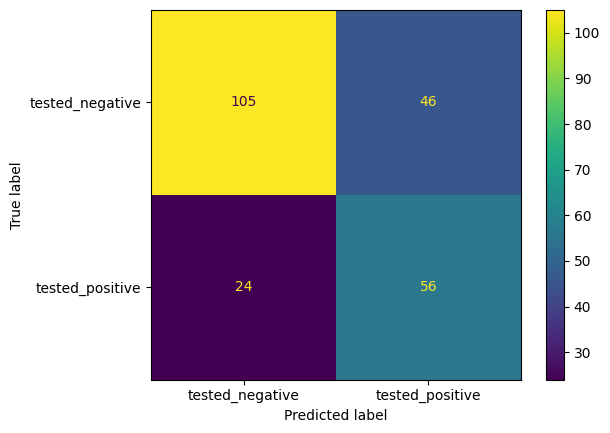

In [ ]:
predictions_train = model.predict(X_train).round()
print(accuracy_score(predictions_train, y_train))

predictions_test = model.predict(X_test).round()
print(accuracy_score(predictions_test, y_test))

cm = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['tested_negative', 'tested_positive'])
disp.plot()

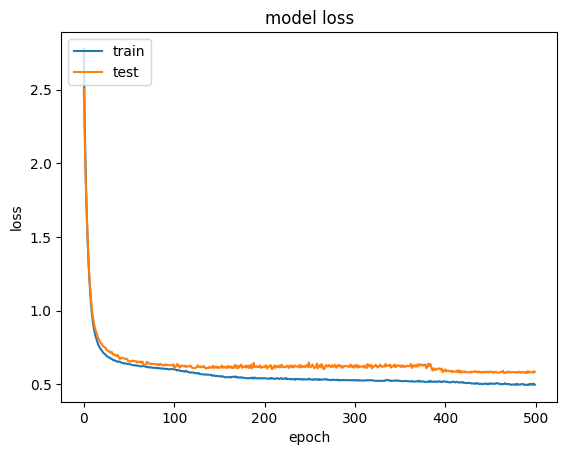

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# ann_viz(model, view=True, title="Diabetes Neural Network")
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
